___

<a href='http://www.dourthe.tech'> <img src='Dourthe_Technologies_Headers.png' /></a>
___
<center><em>For more information, visit <a href='http://www.dourthe.tech'>www.dourthe.tech</a></em></center>

# Automated Motion Detection using Dense Optical Flow Mapping

___
## Objective
Build an algorithm enabling automated detection of motion on loaded or live videos using Dense Optical Flow and the functionality of the Gunnar Farneback's algorithm.

___
## Algorithm preview
The algorithm allows to either load a video or run a live feed from your webcam and will open two windows to display to original video (or live feed) and the resulting dense optical flow mapping.

The result of the Gunnar Farneback algorithm will also be convert using an HSV color mapping technique, which will allow the direction of the motion to be color coding:

* red flow: left to right motion
* blue flow: right to left motion

**Example 1**
<img src="img/algorithm_preview1.jpg" alt="Drawing" style="width: 1000px;"/>

**Example 2**
<img src="img/algorithm_preview2.jpg" alt="Drawing" style="width: 1000px;"/>

___
## Libraries Imports
### Data manipulation and analysis

In [1]:
import os
import numpy as np

### Data visualization

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

### Computer vision

In [3]:
import cv2

___
## Data Import and Visualization
**We will start by creating a list containing the filenames of all videos contained in the _data_ folder.**

In [4]:
videos = os.listdir('data')

**Let's load and display the first frames of the first two videos.**
Note that using the _imshow_ method from the cv2 library require to open a separate window. In order to visualize the image within the notebook, we will use _imshow_ method from matplotlib instead.

However, since cv2 reads image with a Blue, Green, Red (BGR) color convention, we need to use the cvtColor method from cv2 to convert the color channels from BGR to Red, Green, Blue (RGB).

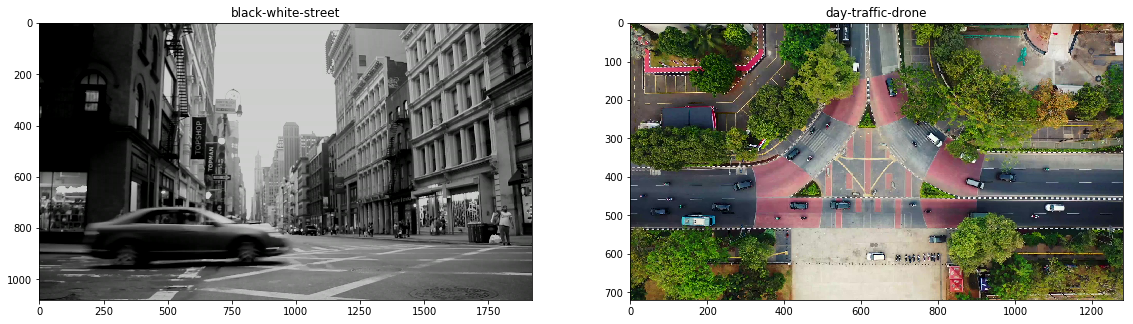

In [35]:
plt.figure(figsize=(30,20))
plt.subplot(131)
v0 = cv2.VideoCapture('data/' + videos[0])
ret0, fr0 = v0.read()
plt.imshow(cv2.cvtColor(fr0, cv2.COLOR_BGR2RGB))
plt.title(videos[0].split('.')[0])
plt.subplot(132)
v1 = cv2.VideoCapture('data/' + videos[1])
ret1, fr1 = v1.read()
plt.imshow(cv2.cvtColor(fr1, cv2.COLOR_BGR2RGB))
plt.title(videos[1].split('.')[0])
plt.show()

___
## Gunnar Farneback's Algorithm
### Load random video, resize and convert first frame to grayscale

In [105]:
cap = cv2.VideoCapture('data/' + videos[3])

# Define resize ratio as a percentage of the original size
resize_ratio = 60
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) * resize_ratio / 100)
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) * resize_ratio / 100)
dim = (width, height)

ret, frame = cap.read()
frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
previous_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

### Initialize mask
**Here, we will create an empty mask onto which the dense optical flow will be drawn later on.**

In [106]:
hsv_mask = np.zeros_like(frame)
hsv_mask[:,:,1] = 255

### Apply Gunnar Farneback's algorithm to video

In [107]:
while True:
    
    # Read video, resize and convert frame to grayscale
    ret, frame = cap.read()
    frame = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA)
    current_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply Gunnar Farneback's algorithm
    flow = cv2.calcOpticalFlowFarneback(previous_frame, current_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
    # Use HSV color to display motion in a color that reflect movement direction
    mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1], angleInDegrees=True)
    hsv_mask[:,:,0] = ang/2
    hsv_mask[:,:,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    
    # Convert back to BGR for display
    bgr_mask = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
    cv2.imshow('Original Video', frame)
    cv2.imshow('Dense Optical Flow', bgr_mask)
    
    # Allow user to press 'Esc' key to exit while loop and close window
    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break
    
    # Set the previous frame as the current frame in preparation for next iteration
    previous_frame = current_frame

cv2.destroyAllWindows()

### Apply Gunnar Farneback's algorithm to live webcam feed
**Here, we will use the same code on a live feed generated by your own webcam.**

In [59]:
# Start webcam video capture
cap = cv2.VideoCapture(0)

# Read and convert frames into grayscale
ret, frame = cap.read()
previous_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Initialize empty mask
hsv_mask = np.zeros_like(frame)
hsv_mask[:,:,1] = 255

while True:
    
    # Read video and convert frame to grayscale
    ret, frame = cap.read()
    current_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Apply Gunnar Farneback's algorithm
    flow = cv2.calcOpticalFlowFarneback(previous_frame, current_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        
    # Use HSV color to display motion in a color that reflect movement direction
    mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1], angleInDegrees=True)
    hsv_mask[:,:,0] = ang/2
    hsv_mask[:,:,2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    
    # Convert back to BGR for display
    bgr_mask = cv2.cvtColor(hsv_mask, cv2.COLOR_HSV2BGR)
    cv2.imshow('Live Feed', frame)
    cv2.imshow('Dense Optical Flow', bgr_mask)
    
    # Allow user to press 'Esc' key to exit while loop and close window
    k = cv2.waitKey(30) & 0xFF
    if k == 27:
        break
    
    # Set the previous frame as the current frame in preparation for next iteration
    previous_frame = current_frame

cap.release()
cv2.destroyAllWindows()